<a href="https://colab.research.google.com/github/karthickthangadurai/Guvi_Task_6/blob/main/T6_Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Brain vs. Body Weight
In the file brain_body.txt, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

Tasks

1)Find the linear regression equation for this data for brain weight to body weight.

2)Chart the original data and the equation on the chart.

3)Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model

In [2]:
df = pd.read_fwf("/content/brain_body.txt")

In [3]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [4]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Brain   62 non-null     float64
 1   Body    62 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [6]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(62, 2)

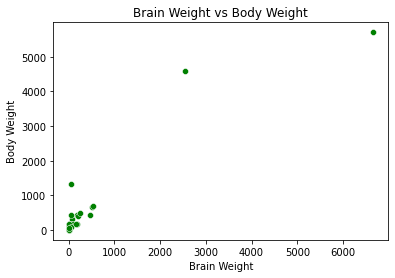

In [9]:
sns.scatterplot(x='Brain', y='Body',data=df,color="green")
plt.title('Brain Weight vs Body Weight')
plt.xlabel('Brain Weight')
plt.ylabel('Body Weight')
plt.show()

<Figure size 720x576 with 0 Axes>

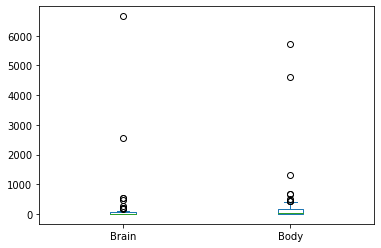

In [10]:
plt.figure(figsize=(10, 8))
df.plot(kind='box')

# **Cleaning Ouliers**

In [11]:
#Finding the IQR in Brain
percentile25 = df['Brain'].quantile(0.25)
percentile75 = df['Brain'].quantile(0.75)
iqr=percentile75 - percentile25
print("IQR is ",iqr)
print("25th Percentile of the Brain data--->",percentile25)
print("75th Percentile of the Brain data--->",percentile75)
#Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper Limit--->",upper_limit)
print("Lower Limit--->",lower_limit)

IQR is  47.6025
25th Percentile of the Brain data---> 0.6000000000000001
75th Percentile of the Brain data---> 48.2025
Upper Limit---> 119.60625
Lower Limit---> -70.80375000000001


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


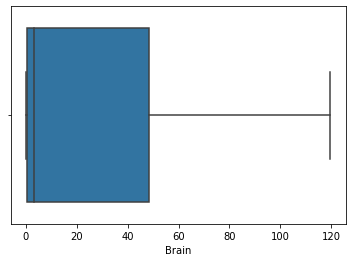

In [12]:
df.Brain = np.where(df.Brain>upper_limit,upper_limit,df.Brain)
#finding outliers
plt.figure(figsize=(6, 4))
sns.boxplot(df.Brain)

In [13]:
#Finding the IQR in Body
percentile25 = df['Body'].quantile(0.25)
percentile75 = df['Body'].quantile(0.75)
iqr=percentile75 - percentile25
print("IQR is ",iqr)
print("25th Percentile of the Body data--->",percentile25)
print("75th Percentile of the Body data--->",percentile75)
#Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper Limit--->",upper_limit)
print("Lower Limit--->",lower_limit)

IQR is  161.75
25th Percentile of the Body data---> 4.25
75th Percentile of the Body data---> 166.0
Upper Limit---> 408.625
Lower Limit---> -238.375


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


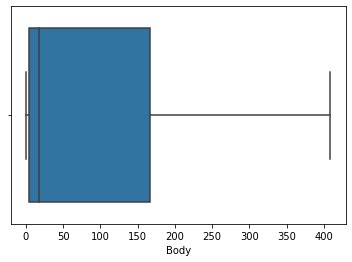

In [14]:
df.Body = np.where(df.Body>upper_limit,upper_limit,df.Body)
#finding outliers
plt.figure(figsize=(6, 4))
sns.boxplot(df.Body)

In [15]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,29.176476,104.676532
std,45.213842,148.635231
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,119.606250,408.625000


# **Splitting Data**

In [16]:
X = df.loc[:, ['Brain']].values # select all rows and select all columns except the last column as my feature
y = df.loc[:, 'Body'].values.reshape(-1,1) # target as arrays
# Syntax : dataset.loc[:, :-1]
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =0)

# **Scaling**

In [17]:
# from sklearn.preprocessing import StandardScaler # importing the required function
# scaler = StandardScaler() #initialis
# scaler.fit(X_train) # find the values of mu and sigma
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it

# **Modelling**

In [18]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

# **The linear regression equation for this data**

In [19]:
print("regressor.intercept:",regressor.intercept_) # c
print("regressor.coef",regressor.coef_)
print(f"Linear Regression Equation y_pred = ({regressor.coef_} * Brain_weight) + {regressor.intercept_} ")

regressor.intercept: [19.01173961]
regressor.coef [[2.71872849]]
Linear Regression Equation y_pred = ([[2.71872849]] * Brain_weight) + [19.01173961] 


# **The original data and the equation on the chart**

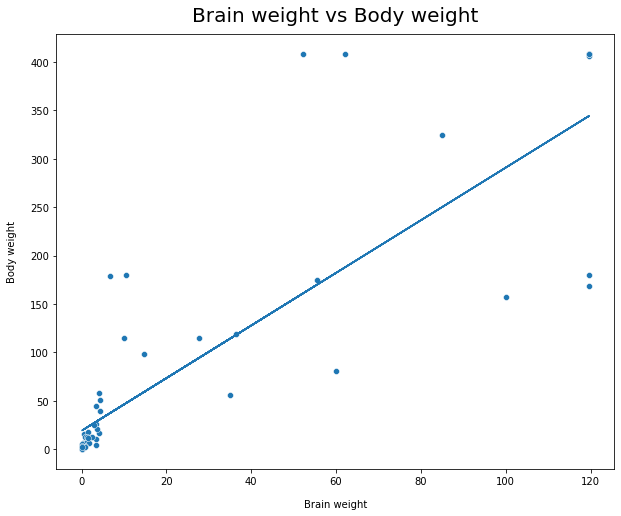

In [20]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Brain', y='Body', data=df)
plt.title("Brain weight vs Body weight", y=1.015, fontsize=20)
plt.xlabel("Brain weight", labelpad=13)
plt.ylabel("Body weight", labelpad=13)
ax = plt.gca()
plt.plot(X_test,regressor.predict(X_test))

In [21]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([[ 21.05078598],
       [344.18865935],
       [ 28.52728934],
       [182.13544915],
       [ 19.77298359],
       [114.16723684],
       [ 21.51296983],
       [160.82061777],
       [ 22.68202308],
       [169.90117094],
       [ 22.84514679],
       [117.78314574],
       [ 19.28633119],
       [344.18865935],
       [344.18865935],
       [ 37.49909336],
       [ 30.52555478],
       [344.18865935],
       [ 21.83921724]])

# **R2 score**

In [22]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.7819152932422735
